In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from preprocessing import removeOutliers
from scipy.stats import chi2_contingency
from meta_data import best_numeric_columns
from meta_data import best_categoric_columns
import statsmodels.api as sm
from statsmodels.formula.api import ols

# load dataset
data_ = pd.read_csv('cleaned_data.csv')

def createStackedBars(data=None, 
                      columns:list=[], 
                      target:str=''):
    for column in columns:
        # Create a crosstab for each categorical column against ProgressStatus
        crosstab = pd.crosstab(data[column], data[target])
        
        # Plot a stacked bar plot
        crosstab.plot(kind='bar', stacked=True)
        plt.title(f'{column} vs ProgressStatus')
        plt.show()


def performChi2Test(data=None,
                    columns:list=[],
                    target:str=''):
    # Perform Chi-Square test of independence for each categorical column
    for column in columns:
        # Create a crosstab for the categorical column and ProgressStatus
        crosstab = pd.crosstab(data[column], data[target])
        
        # Perform Chi-Square test
        chi2, p, dof, expected = chi2_contingency(crosstab)
        
        print(f"Chi-Square Test for {column} vs ProgressStatus:")
        print(f"Chi2 Statistic: {chi2}")
        print(f"P-Value: {p}\n")


def createBoxPlots(data=None, columns:list=[], target:str=''):
    for column in columns:
        data_swept = removeOutliers(data=data, column=column) 
        sns.boxplot(x=target, y=column, data=data_swept)
        plt.title(f'{column} vs ProgressStatus')
        plt.show()


def performANOVA(data=None, columns:list=[], target:str=''):

    # Perform ANOVA for each numeric variable against ProgressStatus
    for column in columns:
        model = ols(f'{column} ~ C({target})', data=data).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)
        print(f"ANOVA result for {column} vs ProgressStatus:")
        print(anova_table)
        print("\n")

In [ ]:
data_ = pd.read_csv('cleaned_data1.csv')

In [ ]:
data_.columns

Index(['District', 'Cluster', 'Village', 'HouseholdSize', 'TimeToOPD',
       'TimeToWater', 'AgricultureLand', 'Season1CropsPlanted',
       'Season2CropsPlanted', 'PerennialCropsGrown', 'VSLA_Profits',
       'VSLA_Profits.1', 'Season1VegetableIncome', 'Season2VegatableIncome',
       'VegetableIncome', 'Season1VegetableValue', 'Season2VegetableValue',
       'SeasonalVegetableValue', 'FormalEmployment',
       'PersonalBusinessAndSelfEmployment', 'CasualLabour',
       'RemittancesAndGifts', 'RentIncome', 'Season1CropIncome',
       'Season2CropIncome', 'SeasonalCropIncome', 'PerenialCropIncome',
       'LivestockIncome', 'Season1AgricValue', 'Season2AgricValue',
       'SeasonalAgricValue', 'PerennialAgricValue', 'AgricValue',
       'LivestockIncomeConsumed', 'LivestockAssetValue', 'HouseholdIcome',
       'Consumption+Residues', 'HHIncome+Consumption+Residues',
       'HHIncome+Consumption+Assets+Residues', 'Assets', 'Assets.1',
       'HHIncome/Day', 'Consumption/Day', 'HHIncome

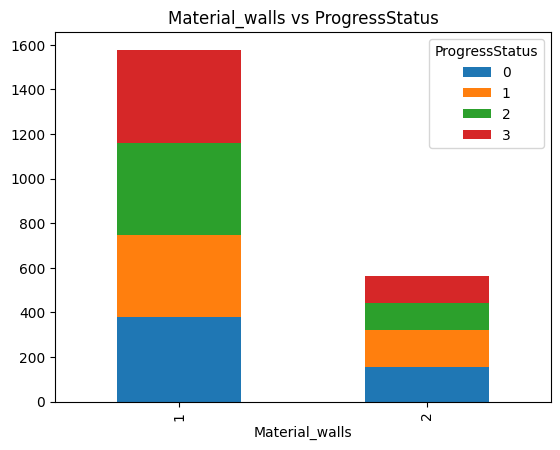

In [ ]:
createStackedBars(data=data_, columns=['Material_walls'], target='ProgressStatus')

In [ ]:
data_[data_['Material_walls'] == 1 ]['ProgressStatus'].value_counts()

ProgressStatus
3    417
2    413
0    380
1    368
Name: count, dtype: int64

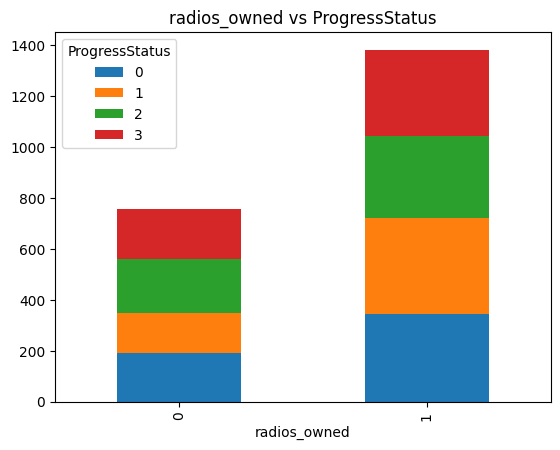

In [ ]:
createStackedBars(data=data_, columns=['radios_owned'], target='ProgressStatus')

In [ ]:
data_[data_['radios_owned'] == 1 ]['ProgressStatus'].value_counts()

ProgressStatus
1    378
0    345
3    339
2    321
Name: count, dtype: int64

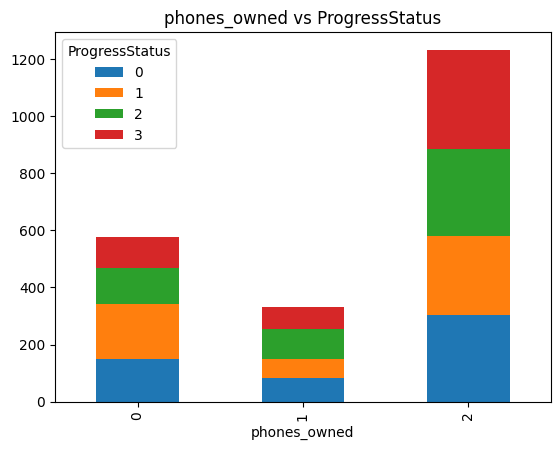

In [ ]:
createStackedBars(data=data_, columns=['phones_owned'], target='ProgressStatus')

In [ ]:
data_[data_['phones_owned'] == 1 ]['ProgressStatus'].value_counts()

ProgressStatus
2    105
0     83
3     79
1     65
Name: count, dtype: int64

In [ ]:
data_[data_['phones_owned'] == 0 ]['ProgressStatus'].value_counts()

ProgressStatus
1    193
0    149
2    126
3    108
Name: count, dtype: int64

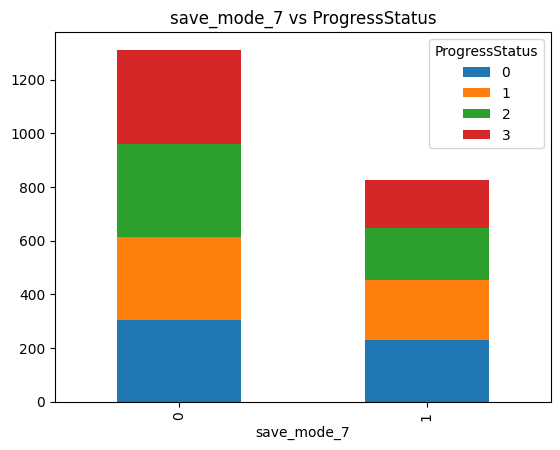

In [ ]:
createStackedBars(data=data_, columns=['save_mode_7'], target='ProgressStatus')

In [ ]:
data_[data_['save_mode_7'] == 0 ]['ProgressStatus'].value_counts()

ProgressStatus
3    353
2    344
1    310
0    305
Name: count, dtype: int64

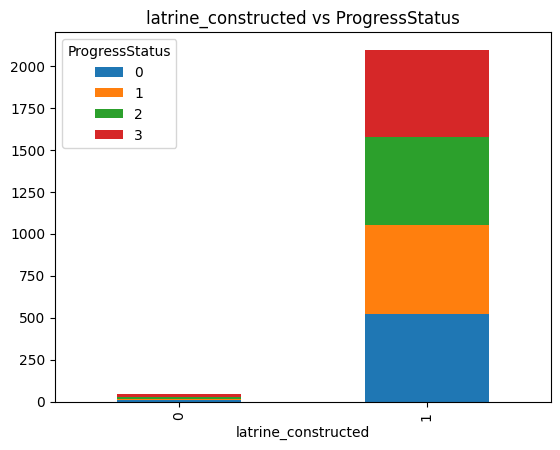

In [ ]:
createStackedBars(data=data_, columns=['latrine_constructed'], target='ProgressStatus')

In [ ]:
data_[data_['latrine_constructed'] == 0 ]['ProgressStatus'].value_counts()

ProgressStatus
2    14
3    13
0    10
1     7
Name: count, dtype: int64

In [ ]:
data_[data_['latrine_constructed'] == 1 ]['ProgressStatus'].value_counts()

ProgressStatus
1    528
0    525
3    522
2    521
Name: count, dtype: int64

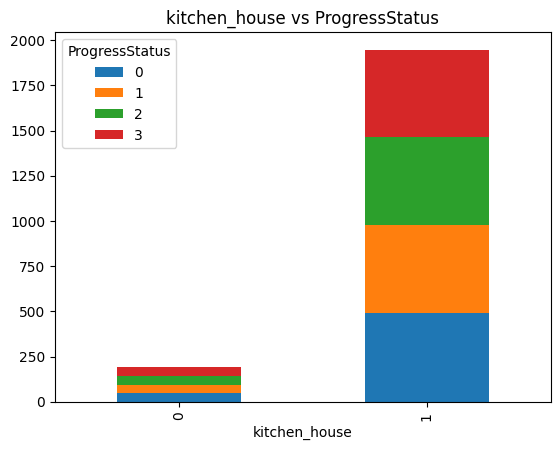

In [ ]:
createStackedBars(data=data_, columns=['kitchen_house'], target='ProgressStatus')

In [ ]:
data_[data_['kitchen_house'] == 1 ]['ProgressStatus'].value_counts()

ProgressStatus
2    490
0    489
1    486
3    482
Name: count, dtype: int64

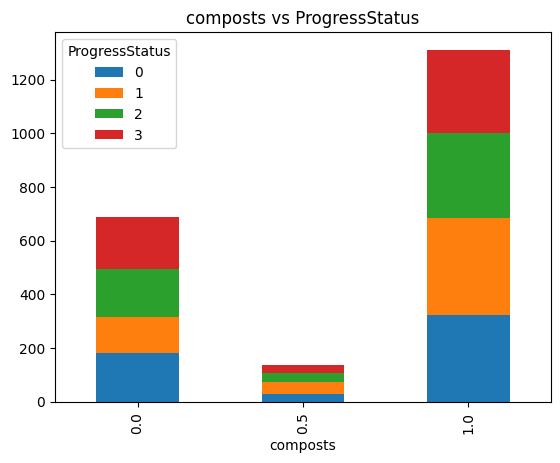

In [ ]:
createStackedBars(data=data_, columns=['composts'], target='ProgressStatus')

In [ ]:
data_[data_['composts'] == 1 ]['ProgressStatus'].value_counts()

ProgressStatus
1    359
0    324
2    319
3    310
Name: count, dtype: int64